### Save the Model and Feature Extractor Locally

In [1]:
from transformers import ViTForImageClassification, ViTFeatureExtractor

# Load the model and feature extractor from Hugging Face
model_name = "m-faraz-ali/Vit_Classification_Pneumonia"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Save the model and feature extractor locally
save_directory = "./vit_classification_pneumonia"
model.save_pretrained(save_directory)
feature_extractor.save_pretrained(save_directory)


config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/343M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/580 [00:00<?, ?B/s]

c:\Users\my658\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


['./vit_classification_pneumonia\\preprocessor_config.json']

### Load the Model and Feature Extractor Locally

In [3]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
import torch
from PIL import Image
import torchvision.transforms as transforms

# Load the model and feature extractor from the local directory
save_directory = "./vit_classification_pneumonia"
model = ViTForImageClassification.from_pretrained(save_directory)
feature_extractor = ViTFeatureExtractor.from_pretrained(save_directory)


In [4]:
# Load and preprocess the image
image_path = "./test/PNEUMONIA/person66_virus_125.jpeg" 
# image_path = "./test/NORMAL/IM-0069-0001.jpeg" 

image = Image.open(image_path).convert("RGB")

# Preprocess the image using the feature extractor
inputs = feature_extractor(images=image)

# Convert the BatchFeature object to the required format
inputs = {key: torch.tensor(value) for key, value in inputs.items()}

# Define the label mapping manually
labels = {0: 'Normal', 1: 'Pneumonia'}

# Perform inference
with torch.no_grad():
    outputs = model(**inputs)

# Get the predicted class index
predicted_class_idx = outputs.logits.argmax(-1).item()

# Use the labels dictionary to get the predicted label
predicted_label = labels[predicted_class_idx]

print(f"Predicted label: {predicted_label}")

Predicted label: Pneumonia


In [2]:
import cv2
# Function to load images
def load_images(path_pattern):
    import glob
    images = []
    for filename in glob.glob(path_pattern):
        img = cv2.imread(filename)
        img = cv2.resize(img, (128, 128))
        images.append(img)
    return images

healthy_test = load_images('./test/NORMAL/*.jpeg')
pneumonia_test = load_images('./test/PNEUMONIA/*.jpeg')

### Healthy Test Set

In [3]:
from PIL import Image
import torch
import numpy as np

In [4]:
def classify_images(dataset):
    # Define the label mapping manually
    labels = {0: 'Normal', 1: 'Pneumonia'}

    # Iterate over each image array in healthy_test
    for image_array in healthy_test:
        # Convert the numpy array to a PIL image
        image = Image.fromarray(image_array).convert("RGB")

        # Preprocess the image using the feature extractor
        inputs = feature_extractor(images=image, return_tensors="pt")

        # Perform inference
        with torch.no_grad():
            outputs = model(**inputs)

        # Get the predicted class index
        predicted_class_idx = outputs.logits.argmax(-1).item()

        # Use the labels dictionary to get the predicted label
        predicted_label = labels[predicted_class_idx]

        print(f"Predicted label: {predicted_label}")

In [5]:
classify_images(healthy_test)

Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: No

### Pneumonia Test Set

In [6]:
classify_images(pneumonia_test)

Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Pneumonia
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: Normal
Predicted label: No

  0%|          | 0/1000 [00:00<?, ?it/s]

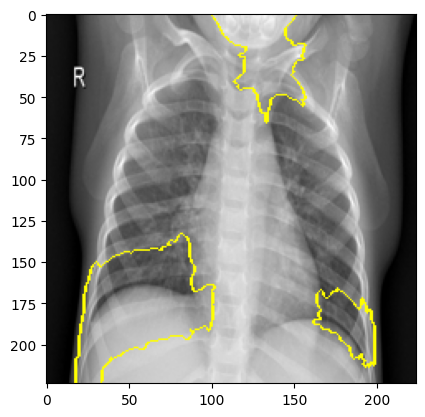

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load and preprocess the image
image_path = './test/NORMAL/IM-0069-0001.jpeg'
image = Image.open(image_path).convert('RGB')
image = np.array(image.resize((224, 224)))  # Resizing to model's input size

# Define the function to predict on images
def predict_fn(images):
    inputs = feature_extractor(images=list(images), return_tensors="pt").to(model.device)
    outputs = model(**inputs)
    return torch.nn.functional.softmax(outputs.logits, dim=1).detach().cpu().numpy()

# Initialize LIME
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image, predict_fn, top_labels=1, hide_color=0, num_samples=1000)

# Display explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 255.0, mask))
plt.show()